# Lab4

## Task 1 Text generation via LSTM model

In [1]:
import tensorflow as tf
import numpy as np
import random

from tensorflow.keras import layers, models

In [2]:
path = "./archive/Franko_Ivan-Franko-pro-Grigoriya-Skovorodu.txt"

In [3]:
with open(path, encoding="utf-8") as f:
    text = f.read().lower()
text = text.replace("\n", " ")
text = text[:10000]
print("Text length:", len(text))

Text length: 10000


In [4]:
chars = sorted(list(set(text)))
print("Total chars:", len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

Total chars: 63


In [5]:
maxlen = 40
step = 1
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i : i + maxlen])
    next_chars.append(text[i + maxlen])
print("Number of sequences:", len(sentences))

x = np.zeros((len(sentences), maxlen, len(chars)), dtype="bool")
y = np.zeros((len(sentences), len(chars)), dtype="bool")
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 9960


In [6]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(maxlen, len(chars))),
        layers.LSTM(128),
        layers.Dense(len(chars), activation="softmax"),
    ]
)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               98304     
                                                                 
 dense (Dense)               (None, 63)                8127      
                                                                 
Total params: 106431 (415.75 KB)
Trainable params: 106431 (415.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype("float64")
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [8]:
model.fit(x, y, batch_size=128, epochs=100, callbacks=[callback])

Epoch 1/100
78/78 [==============================] - 7s 67ms/step - loss: 3.1762
Epoch 2/100
78/78 [==============================] - 5s 69ms/step - loss: 2.6660
Epoch 3/100
78/78 [==============================] - 5s 67ms/step - loss: 2.4510
Epoch 4/100
78/78 [==============================] - 6s 70ms/step - loss: 2.2964
Epoch 5/100
78/78 [==============================] - 5s 70ms/step - loss: 2.1548
Epoch 6/100
78/78 [==============================] - 5s 69ms/step - loss: 2.0183
Epoch 7/100
78/78 [==============================] - 5s 69ms/step - loss: 1.8699
Epoch 8/100
78/78 [==============================] - 5s 69ms/step - loss: 1.7275
Epoch 9/100
78/78 [==============================] - 5s 70ms/step - loss: 1.5749
Epoch 10/100
78/78 [==============================] - 6s 72ms/step - loss: 1.4369
Epoch 11/100
78/78 [==============================] - 5s 70ms/step - loss: 1.2967
Epoch 12/100
78/78 [==============================] - 6s 71ms/step - loss: 1.1813
Epoch 13/100
78/78 [=====

In [9]:
start_index = random.randint(0, len(text) - maxlen - 1)
generated = ""
sentence = text[start_index : start_index + maxlen]
print('...Generating with seed: "' + sentence + '"')

for i in range(400):
    x_pred = np.zeros((1, maxlen, len(chars)))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_indices[char]] = 1.0
    preds = model.predict(x_pred, verbose=0)[0]
    #next_index = sample(preds, diversity)
    next_index = np.argmax(preds)
    next_char = indices_char[next_index]
    sentence = sentence[1:] + next_char
    generated += next_char

print("...Generated: ", generated)
print("-")

...Generating with seed: "григорій сковорода — поява вельми замітн"
...Generated:  а в історії розвою українського народу, а тим самим і українського народу, а тим самим і українського народу, а тим самим і українського народу, а тим самим і українського народу, а тим самим і українського народу, а тим самим і українського народу, а тим самим і українського народу, а тим самим і українського народу, а тим самим і українського народу, а тим самим і українського народу, а тим сами
-


In [10]:
start_index = random.randint(0, len(text) - maxlen - 1)

for diversity in [0.2, 0.5, 1.0, 1.2]:
    print("...Diversity:", diversity)

    generated = ""
    sentence = text[start_index : start_index + maxlen]
    print('...Generating with seed: "' + sentence + '"')
        
    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.0
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]
        sentence = sentence[1:] + next_char
        generated += next_char
    
    print("...Generated: ", generated)
    print("-")

...Diversity: 0.2
...Generating with seed: " часом його найвірнішим другом аж до сам"
...Generated:  ої смерті сковороди він підніс у харківськім історично-філологічнім товаристві думку — зібрати й видати в одній збірці всі твори сковороди, котрі колись від напосин змага карити на було місця в суспільній ієрархії. та ще раз підійшла до нього покуса в самій принадній формі. в р. 1766 в харківських видання порівняння дві стате кине багалій на учителя поезії, він був пупувані, що зіднія сумніву і по
-
...Diversity: 0.5
...Generating with seed: " часом його найвірнішим другом аж до сам"
...Generated:  ої смерті сковороди він підніс у харківськім усі те, що в життєписі й характеристикова* (1823), і. і. срезневського (1862, 1866), сумцова, котрий уперве видав в «киевск[ой] стар[ине]» (1886) «житие» сковороди, на україну, відчова і відшучато три важав по просые з  сучасно робувався з московський духерики, добідрові і    435    знайомого поміщика або священика до друга —азі праці, що доторкают

## Task 2 HF Transformers Usage

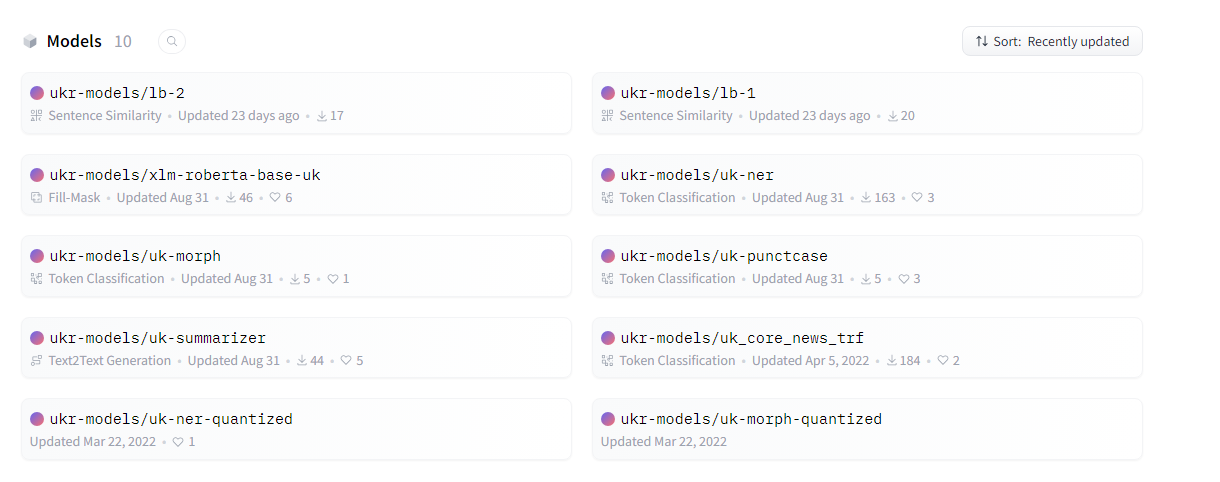

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
from transformers import pipeline

pipe = pipeline("token-classification", model="ukr-models/uk-ner")

pipe("Могила Тараса Шевченка — місце поховання видатного українського поета Тараса Шевченка в місті Канів (Черкаська область) на Чернечій горі, над яким із 1939 року височіє бронзовий пам'ятник роботи скульптора Матвія Манізера.")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaForTokenClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFXLMRobertaForTokenClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaForTokenClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaForTokenClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaForTokenClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and the model 

[{'entity': 'B-PER',
  'score': 0.9621774,
  'index': 3,
  'word': '▁Тарас',
  'start': 6,
  'end': 12},
 {'entity': 'B-PER',
  'score': 0.95024186,
  'index': 4,
  'word': 'а',
  'start': 12,
  'end': 13},
 {'entity': 'I-PER',
  'score': 0.89840263,
  'index': 5,
  'word': '▁Шевченка',
  'start': 13,
  'end': 22},
 {'entity': 'B-PER',
  'score': 0.9997545,
  'index': 16,
  'word': '▁Тарас',
  'start': 69,
  'end': 75},
 {'entity': 'B-PER',
  'score': 0.9999771,
  'index': 17,
  'word': 'а',
  'start': 75,
  'end': 76},
 {'entity': 'I-PER',
  'score': 0.99953413,
  'index': 18,
  'word': '▁Шевченка',
  'start': 76,
  'end': 85},
 {'entity': 'B-LOC',
  'score': 0.9999757,
  'index': 21,
  'word': '▁Кан',
  'start': 93,
  'end': 97},
 {'entity': 'B-LOC',
  'score': 0.99998057,
  'index': 22,
  'word': 'ів',
  'start': 97,
  'end': 99},
 {'entity': 'B-LOC',
  'score': 0.9999881,
  'index': 24,
  'word': 'Чер',
  'start': 101,
  'end': 104},
 {'entity': 'B-LOC',
  'score': 0.9999877,
  'in

## Task 3 Image generation via GAN architecture

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

In [12]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape[0], 'train samples')
print('image shape', x_train[0].shape)

4422102/4422102 [==============================] - 1s 0us/step
60000 train samples
image shape (28, 28)


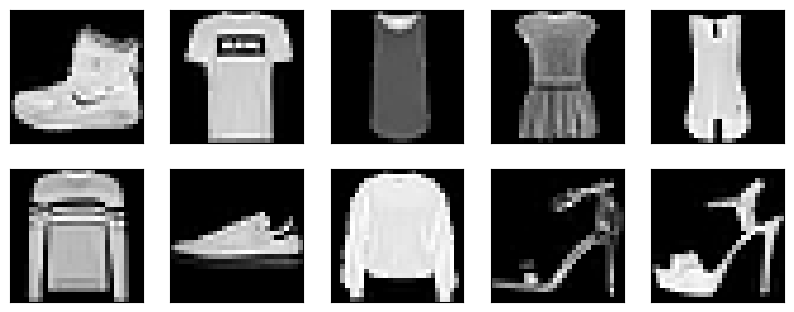

In [18]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')

plt.show()

In [20]:
x_train =  x_train.astype('float32')
x_train = x_train/255

In [47]:
generator = models.Sequential()
generator.add(layers.Dense(512,input_shape=[100]))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))
generator.add(layers.Dense(256))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))
generator.add(layers.Dense(128))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))
generator.add(layers.Dense(784))
generator.add(layers.Reshape([28,28,1]))

In [48]:
discriminator = models.Sequential()
discriminator.add(layers.Dense(1,input_shape=[28,28,1]))
discriminator.add(layers.Flatten())
discriminator.add(layers.Dense(256))
discriminator.add(layers.LeakyReLU(alpha=0.2))
discriminator.add(layers.Dropout(0.5))
discriminator.add(layers.Dense(128))
discriminator.add(layers.LeakyReLU(alpha=0.2))
discriminator.add(layers.Dropout(0.5))
discriminator.add(layers.Dense(64))
discriminator.add(layers.LeakyReLU(alpha=0.2))
discriminator.add(layers.Dropout(0.5))
discriminator.add(layers.Dense(1,activation='sigmoid'))

In [49]:
GAN = models.Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [50]:
def plot_generated_images(epoch, generator):
    num_of_images = 5
    noise = np.random.normal(0, 1, size=[num_of_images, latent_dim])
    generated_images=generator.predict(noise).reshape(num_of_images, 28, 28)
    plt.figure()
    for i in range(num_of_images):
        plt.subplot(1, 5, i+1)
        plt.imshow(generated_images[i], cmap = 'gray')
        plt.axis('off')
        plt.tight_layout()
    plt.show()

In [52]:
epochs = 100
batch_size = 64
noise_shape=100

Epoch 1
1/1 [==============================] - 0s 209ms/step


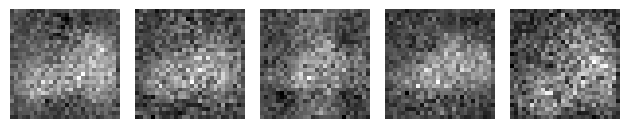

Epoch 21
1/1 [==============================] - 0s 32ms/step


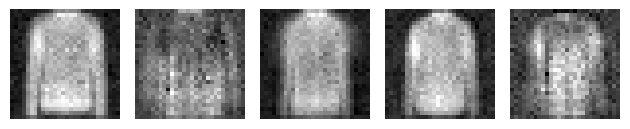

Epoch 41
1/1 [==============================] - 0s 31ms/step


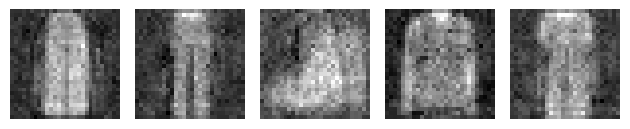

Epoch 61
1/1 [==============================] - 0s 34ms/step


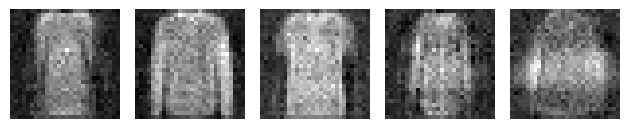

Epoch 81
1/1 [==============================] - 0s 29ms/step


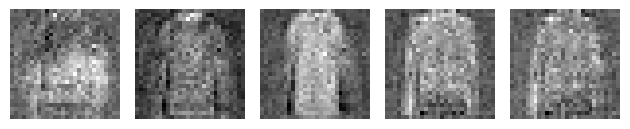

Epoch 101
1/1 [==============================] - 0s 29ms/step


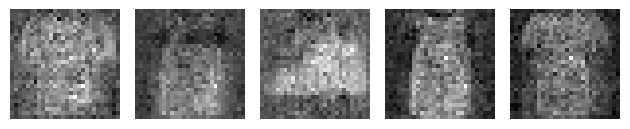

1/1 [==============================] - 0s 29ms/step


In [54]:
 for epoch in range(epochs+1):
    
    for i in range(x_train.shape[0]//batch_size):
            
        noise=np.random.normal(size=[batch_size,noise_shape])
       
        gen_image = generator.predict_on_batch(noise)
        
        train_dataset = x_train[i*batch_size:(i+1)*batch_size]
       
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)
        
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)
        
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False
        
        d_g_loss_batch =GAN.train_on_batch(noise, train_label)
        
    if epoch % 20 == 0:
        print(f"Epoch {epoch+1}")
        plot_generated_images(epoch, generator)
        
noise=np.random.normal(size=[10,noise_shape])
gen_image = generator.predict(noise)